## Application: Color Segmentation using clustering

In this lab, we'll explore color segmentation using kmeans clustering technique.

Color segmentation involves dividing an image into regions based on the colors present in the image.

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.image import imread



**Load the Image**:
- Start by loading the image you want to segment. You can use libraries like OpenCV or PIL to read the image.
- In this lab, we use `imread()` which is a function typically provided by image processing libraries like Matplotlib or OpenCV.
- It's used to read an image file and load it into memory as a NumPy array

In [ ]:
# Make sure that you download the dog image in the same folder.
image = imread('dog.png')

**Preprocess the Image**:
- Convert the image to a format suitable for clustering.
- This may involve **reshaping** the image array and **normalizing** pixel values.

In [ ]:
# Shape of the image
image.shape

(924, 900, 3)

- The image has a height of 924 pixels (i.e., the number of rows of pixels in the image).
- The image has a width of 900 pixels (i.e., number of columns of pixels in the image).
- The image has 3 color channels, which typically represent the Red, Green, and Blue (RGB) color channels.

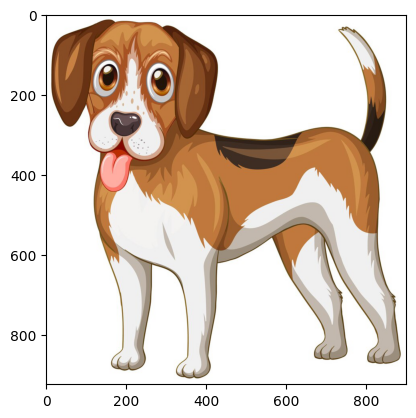

In [ ]:
# Image visualization
plt.imshow(image)
plt.show()

Next, we reshape to a new format where each row represents a pixel, and each pixel is represented by three values corresponding to its RGB color channels.

In [ ]:
# # Reshape the image to a 2D array of pixels
x= image.reshape(-1,3)


(831600, 3)

- The `-1` in the reshape function automatically calculates

---

the size of the first dimension based on the total number of elements in the array and the specified size of the other dimensions.
- Reshape for Clustering: The image is reshaped to a 2D array where each row is a pixel and each column is an RGB value.
- This transformation is essential for performing K-means clustering on the image data.

**Note to self: Give a better explanation to -1**

In [ ]:
# Check the shape
x.shape

(831600, 3)

So, after reshaping, `x` will be a 2D array where each row contains three values representing the RGB color channels of a pixel in the image.

The total number of rows in the reshaped array will be equal to the total number of pixels in the original image (i.e., 924 * 900).

**Model Training**

In [ ]:
# Import the model
from sklearn.cluster import KMeans
# Create an object of KMeans
kmeans =KMeans(n_clusters = 5, random_state =42)
# Fit the model
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
# Check for the centroids
kmeans.cluster_centers_

array([[0.98736024, 0.9870984 , 0.9851121 ],
       [0.31640637, 0.17996955, 0.08800292],
       [0.7501962 , 0.6795235 , 0.62556297],
       [0.7633993 , 0.4934578 , 0.26193354],
       [0.5671851 , 0.3371528 , 0.16674125]], dtype=float32)

In [ ]:
# Check for the labels
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

**Replace each pixel value with its corresponding cluster center**

In [ ]:
# Map the labels to the centers
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image

array([[0.98736024, 0.9870984 , 0.9851121 ],
       [0.98736024, 0.9870984 , 0.9851121 ],
       [0.98736024, 0.9870984 , 0.9851121 ],
       ...,
       [0.98736024, 0.9870984 , 0.9851121 ],
       [0.98736024, 0.9870984 , 0.9851121 ],
       [0.98736024, 0.9870984 , 0.9851121 ]], dtype=float32)

The segmented image needs to be reshaped back to the original image shape after mapping the cluster centers.

In [ ]:
# Reshape
segmented_image = segmented_image.reshape(image.shape)
segmented_image.shape

(924, 900, 3)

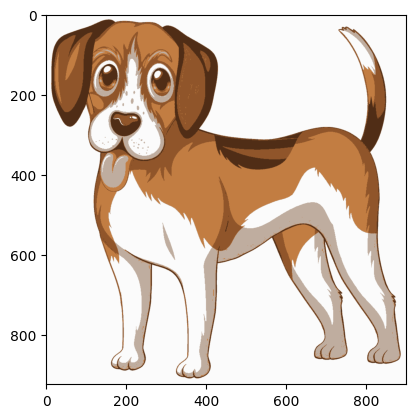

In [ ]:
# Display the segmented image
plt.imshow(segmented_image)
plt.show()

______